# GRIP- The Sparks Foundation


## Data Science and Business Analytics Intern 


## Prediction Using Supervised Machine Learning

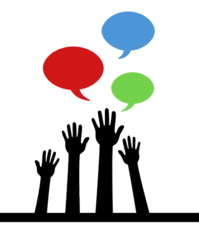





### Author  :  Kripa Krishnan

### BATCH :  SEPTEMBER 2021

## Task-1

### Problem Statement  : Predict percentage of students based on the number of study hours

### To Predict  :  What will be the predicted score if a student studies for 9.25 hrs/day








### Import Libraries


In [121]:
# Importing all libraries required in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Dataset


In [122]:
# Reading data from remote link
url='http://bit.ly/w-data'
data=pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


### Exploratory Data Analysis


In [123]:
#first five rows of dataframe
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [124]:
#concise summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [125]:
#decription statistics of data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [126]:
#Checking correlation
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [127]:
#checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Visualizing Data

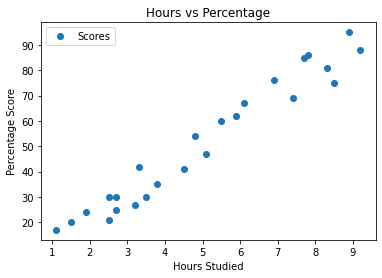

In [128]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Preparing the data

In [129]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

### Train Test Split

In [130]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

### Training the model

In [131]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


### Plotting  the Regression Line

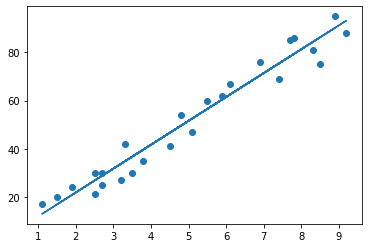

In [132]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
#plot for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making Predictions

In [133]:
print(X_test) 
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [134]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033



### Evaluating Models

In [135]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


### Test with your own data

In [136]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535
